In [1]:
# Import libraries
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import kaggle

from pycaret.regression import *

In [2]:
data = "../data/"

In [39]:
# read the data
df = pd.read_csv(data + 'CarPrice_Assignment.csv')
# view the data
df.head(3)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

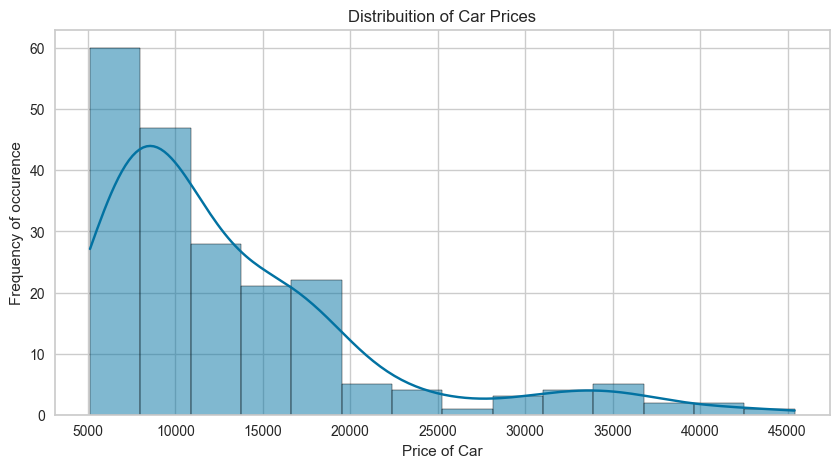

In [8]:
# visualize a distribution of the Car prices
plt.figure( figsize=(10, 5))
sns.histplot(df['price'], kde=True)
plt.title('Distribuition of Car Prices')
plt.ylabel('Frequency of occurence')
plt.xlabel('Price of Car')
plt.show()

In [40]:
df[['brand','Model']] = df['CarName'].str.split(n=1, expand = True)
df.tail(2)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand,Model
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo,246
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,3.78,3.15,9.5,114,5400,19,25,22625.0,volvo,264gl


In [41]:
# check cardinality of the categorical features
cardinality = df.select_dtypes(exclude='number').nunique()
print(cardinality.sort_values())

fueltype            2
aspiration          2
doornumber          2
enginelocation      2
drivewheel          3
carbody             5
enginetype          7
cylindernumber      7
fuelsystem          8
brand              28
Model             141
CarName           147
dtype: int64


In [42]:
# Define a mapping of correct values for replacement
corrections = {'nissan ': 'Nissan', 'maxda': 'mazda', 'porcshce': 'porsche', 'toyouta': 'toyota', 'vokswagen': 'volkswagen', 'vw': 'volkswagen'}

# Apply the corrections to the 'CarBrand' column
df['brand'] = df['brand'].replace(corrections)

In [32]:
sorted(df['brand'].unique())

['Nissan',
 'alfa-romero',
 'audi',
 'bmw',
 'buick',
 'chevrolet',
 'dodge',
 'honda',
 'isuzu',
 'jaguar',
 'mazda',
 'mercury',
 'mitsubishi',
 'nissan',
 'peugeot',
 'plymouth',
 'porsche',
 'renault',
 'saab',
 'subaru',
 'toyota',
 'volkswagen',
 'volvo']

In [43]:
# Assign target to variable
target = 'price'

# identify columns to ignore
# ignored = ['car_ID']
ignored = ['car_ID', 'CarName']

In [44]:
experiment = setup(data=df, target= target,
                    ignore_features=ignored,
                    session_id=40)

,Description,Value
0,Session id,40
1,Target,price
2,Target type,Regression
3,Original data shape,"(205, 28)"
4,Transformed data shape,"(205, 68)"
5,Transformed train set shape,"(143, 68)"
6,Transformed test set shape,"(62, 68)"
7,Ignore features,2
8,Ordinal features,4
9,Numeric features,14


In [46]:
# get the best model
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ada,AdaBoost Regressor,3027.6813,25081385.9090,4338.6009,0.6778,0.2545,0.2079,0.1390
et,Extra Trees Regressor,3352.6856,29043939.3989,4991.2616,0.6150,0.2694,0.2179,0.1660
lightgbm,Light Gradient Boosting Machine,3836.4363,27775356.7781,4999.3012,0.5768,0.3160,0.2904,0.0910
lasso,Lasso Regression,4046.1743,31238018.0722,5385.7616,0.4871,0.3407,0.3112,0.1080
rf,Random Forest Regressor,3918.8598,35484036.3277,5584.9494,0.4816,0.3247,0.2745,0.2310
lr,Linear Regression,4107.1732,32189330.8391,5458.6307,0.4776,0.3442,0.3137,0.0890
llar,Lasso Least Angle Regression,4200.5647,34403087.0243,5647.9284,0.4441,0.3527,0.3261,0.0840
ridge,Ridge Regression,4203.1201,34691101.1749,5655.3219,0.4397,0.3557,0.3287,0.1010
gbr,Gradient Boosting Regressor,4122.8965,43341701.5213,6095.1914,0.4214,0.3414,0.2762,0.1420
dt,Decision Tree Regressor,4083.7722,38927685.4295,5868.9280,0.4073,0.3567,0.3005,0.1310


In [47]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

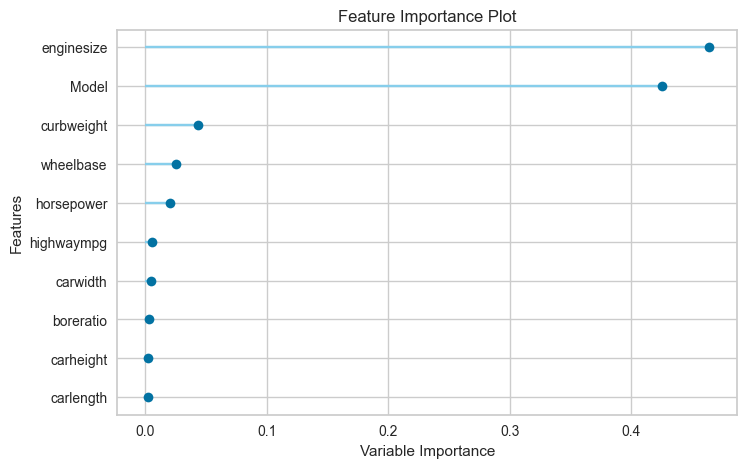

In [48]:
# plot feature importance
plot_model(best_model, plot = 'feature')

In [49]:
# save model
save_model(best_model, 'my_car_pricing_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['symboling', 'wheelbase',
                                              'carlength', 'carwidth',
                                              'carheight', 'curbweight',
                                              'enginesize', 'boreratio',
                                              'stroke', 'compressionratio',
                                              'horsepower', 'peakrpm', 'citympg',
                                              'highwaympg'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['fu...
                                              'fuelsystem', 'brand'],
                                     transformer=OneHotEncoder(cols=['carbody',
                                                                     'drivewheel',
                  